# **DerivaLab # 2 : Options Data and Basic Option Pricing Relationships**
### Group 1: UAL Analysis
### Data as of 04/01/2020

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [196]:
# Read in market data
# Bloomberg
bbg_call = pd.read_excel('UAL_Option_Chain_04012020_bbg.xlsx', header = 1, index_col = 0).iloc[:, 0:6]
bbg_put = pd.read_excel('UAL_Option_Chain_04012020_bbg.xlsx', header = 1, index_col = 7).iloc[:, 7:]

bbg_put.columns = bbg_call.columns
bbg_put.index = bbg_call.index

# Yahoo
yh_call = pd.read_excel('UAL_Option_Chain_04012020_yahoo.xlsx', header = 2, index_col = 2).iloc[:, 0:10].iloc[:,[2,3,4,7,9]]
yh_put = pd.read_excel('UAL_Option_Chain_04012020_yahoo.xlsx', header = 2, index_col = 14).iloc[:, 12:].iloc[:,[2,3,4,7,9]]

yh_call.columns = ['Last', 'Bid', 'Ask', 'Volm', 'IVM']
yh_put.columns = yh_call.columns
yh_put.index = yh_call.index

In [164]:
#Visualize discrepancy
call = bbg_call.join(yh_call, lsuffix='_bbg', rsuffix='_yh')
put = bbg_put.join(yh_put, lsuffix='_bbg', rsuffix='_yh')

In [197]:
#DO NOT RUN THIS MULTIPLE TIMES!!
call['IVM_bbg'] = call['IVM_bbg']/100
put['IVM_bbg'] = put['IVM_bbg']/100

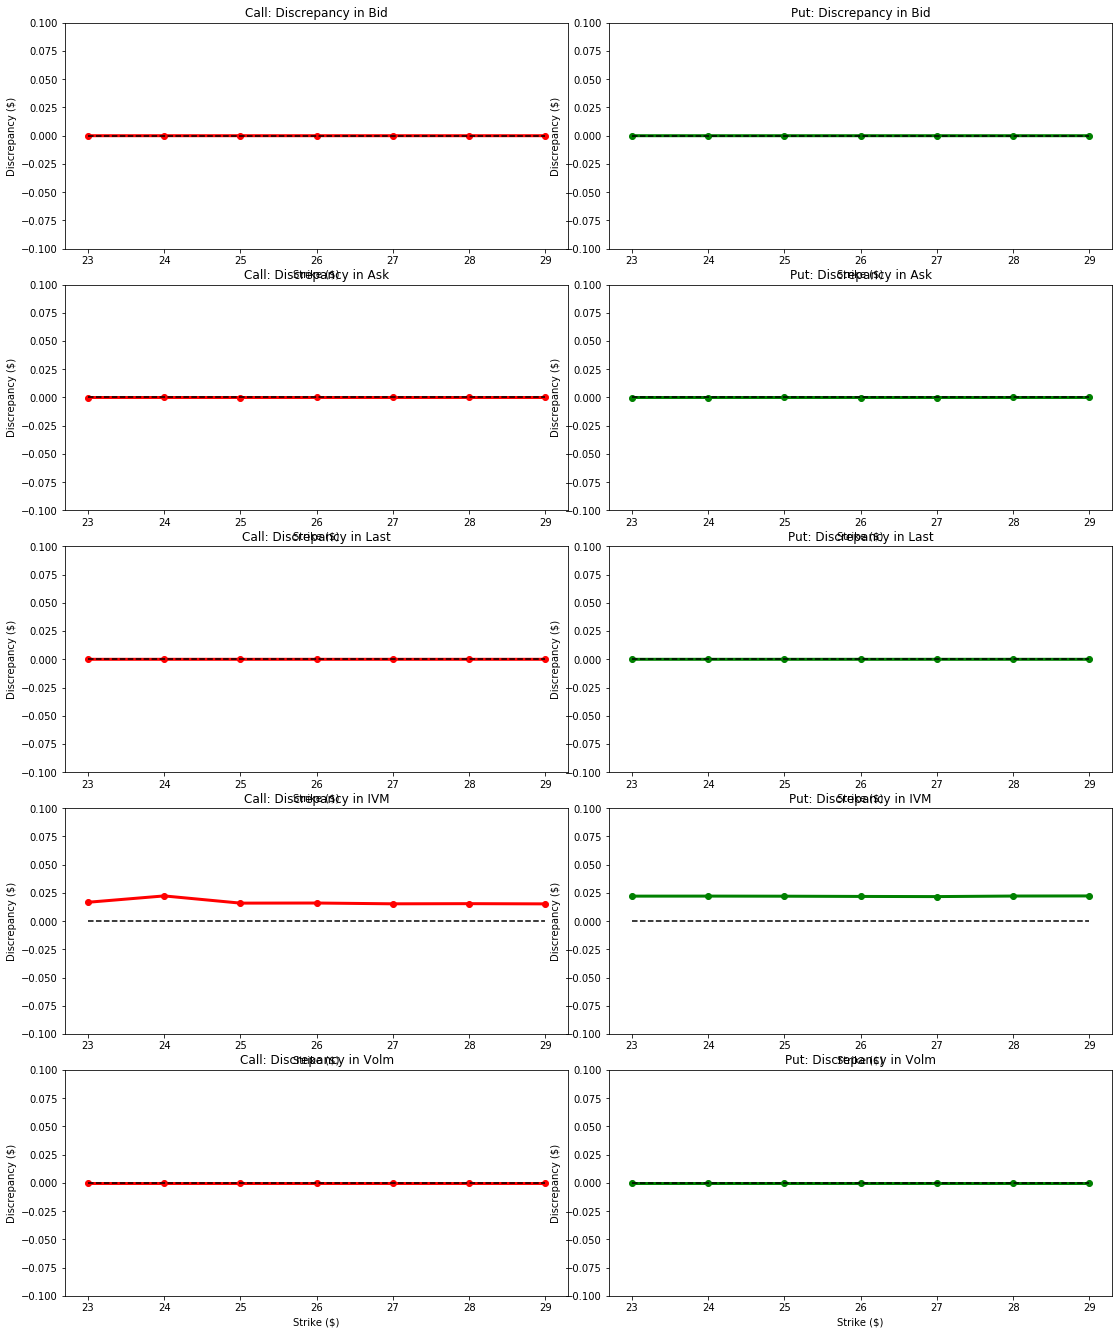

In [167]:
comp = ['Bid', 'Ask', 'Last', 'IVM', 'Volm']
fig, axs = plt.subplots(5, 2,figsize=(15,18))
plt.tight_layout(pad=0.1, w_pad=1.0, h_pad=1.5)
threshold = 0

for row in enumerate(axs):
    ax = row[1]
    x1 = bbg_call.index
    y1 = call['{}_bbg'.format(comp[row[0]])]-call['{}_yh'.format(comp[row[0]])]
    ax[0].plot(x1, y1, color='red', linewidth=3, marker = 'o')
    ax[0].set_ylim(-0.1,0.1)
    ax[0].set(title='Call: Discrepancy in {}'.format(comp[row[0]]),
        ylabel='Discrepancy ($)',
        xlabel='Strike ($)')
    ax[0].plot([23, 29], [threshold, threshold], "k--")
    
    x2 = bbg_put.index
    y2 = put['{}_bbg'.format(comp[row[0]])]-put['{}_yh'.format(comp[row[0]])]
    ax[1].plot(x2, y2, color='green', linewidth=3, marker = 'o')
    ax[1].set_ylim(-0.1,0.1)
    ax[1].set(title='Put: Discrepancy in {}'.format(comp[row[0]]),
        ylabel='Discrepancy ($)',
        xlabel='Strike ($)')
    ax[1].plot([23, 29], [threshold, threshold], "k--")

plt.show()

In [206]:
#Put Option Value Decompostion

#Date 4/1/20
#UAL stock price
S = 25.65

#LIBOR Rate
r = 0.0099

#Time to maturity
m = datetime.datetime(2020, 5, 15)
d = datetime.datetime(2020, 4, 1)
T = (m-d).days/365

#intrinsic value
bbg_put.reset_index(level=0, inplace=True)
bbg_put['Intrinsic_Value'] = bbg_put['Strike'].apply(lambda x: max(x - S, 0)) 
bbg_put['Time_Value'] = bbg_put['Last'] - bbg_put['Intrinsic_Value']
bbg_put['Moneyness'] = bbg_put['Strike']/S

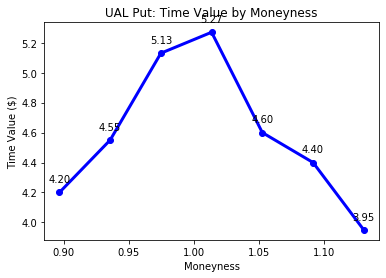

In [213]:
#Plot time_value against moneyness
xs = bbg_put['Moneyness']
ys = bbg_put['Time_Value']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='blue', linewidth=3, marker = 'o')
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.set(title='UAL Put: Time Value by Moneyness',
ylabel='Time Value ($)',
xlabel='Moneyness')
plt.show()

In [224]:
#Calulate Lower Bound
bbg_put.set_index('Strike')
dat = bbg_put.join(bbg_call, on = 'Strike', lsuffix='_put', rsuffix='_call')
dat['Put_Lower_Bound'] = dat['Strike']*np.exp(-r*T)-S+dat['Last_call']
dat['Call_Lower_Bound'] = -dat['Strike']*np.exp(-r*T)+S

In [225]:
dat

,Strike,Ticker_put,Bid_put,Ask_put,Last_put,IVM_put,Volm_put,Intrinsic_Value,Time_Value,Moneyness,Ticker_call,Bid_call,Ask_call,Last_call,IVM_call,Volm_call,Put_Lower_Bound,Call_Lower_Bound
0,23,UAL 5/15/20 P23,4.00,4.20,4.20,160.510968,89,0.00,4.20,0.896686,UAL 5/15/20 C23,6.50,7.10,8.80,161.528368,7,6.122568,2.677432
1,24,UAL 5/15/20 P24,4.45,4.70,4.55,158.314179,104,0.00,4.55,0.935673,UAL 5/15/20 C24,5.95,6.50,6.30,158.330669,10,4.621375,1.678625
2,25,UAL 5/15/20 P25,4.95,5.25,5.13,156.845718,394,0.00,5.13,0.974659,UAL 5/15/20 C25,5.60,5.85,5.64,155.502114,25,4.960182,0.679818
3,26,UAL 5/15/20 P26,5.45,5.70,5.62,153.164396,294,0.35,5.27,1.013645,UAL 5/15/20 C26,5.05,5.50,5.27,153.990508,71,5.588989,-0.318989
4,27,UAL 5/15/20 P27,5.95,6.35,5.95,151.681454,43,1.35,4.60,1.052632,UAL 5/15/20 C27,4.40,5.05,4.52,148.891438,37,5.837797,-1.317797
5,28,UAL 5/15/20 P28,6.55,6.90,6.75,149.489568,213,2.35,4.40,1.091618,UAL 5/15/20 C28,4.10,4.65,4.30,148.814929,32,6.616604,-2.316604
6,29,UAL 5/15/20 P29,7.20,7.50,7.30,148.029073,103,3.35,3.95,1.130604,UAL 5/15/20 C29,3.75,4.25,3.95,147.326120,70,7.265411,-3.315411
